1. Przygotowanie danych
● Załaduj dane do środowiska Pythona.
● Zapoznaj się z dokumentacją i opisem zbioru danych.
● Połącz tabele w celu uzyskania pełnego obrazu klientów i ich pożyczek (np. połącz
dane o pożyczkach z transakcjami i rachunkami klientów).
● Utwórz zmienną opisywaną: niespłacenie pożyczki (1 = niespłacona, 0 =
spłacona).
2. Eksploracyjna analiza danych (EDA)
● Sprawdź podstawowe statystyki opisowe.
● Przeanalizuj rozkład zmiennych (histogramy, wykresy pudełkowe).
● Zidentyfikuj i obsłuż brakujące wartości.
● Sprawdź korelacje między zmiennymi a niespłaceniem pożyczki.
● Zwizualizuj zależności między cechami klientów a niespłaceniem kredytu (np. wpływ
dochodów, wieku, liczby transakcji na prawdopodobieństwo niespłaty).
3. Budowa modelu predykcyjnego
● Przygotuj dane do modelowania:
● Zakoduj zmienne kategoryczne.
● Znormalizuj lub standaryzuj dane.
● Podziel zbiór danych na zestaw treningowy i testowy.
● Zbuduj model klasyfikacyjny przewidujący, czy pożyczka nie zostanie spłacona:
● Wypróbuj różne algorytmy, np. regresję logistyczną, drzewa decyzyjne, lasy losowe,
XGBoost.
● Porównaj wyniki modeli na podstawie metryk takich jak dokładność, precyzja, recall,
F1-score (szczególnie istotny będzie *recall dla klasy "niespłacona pożyczka"*).
● Zwizualizuj krzywe ROC i macierz pomyłek.
4. Analiza wyników i wnioski
● Które cechy są najważniejsze dla przewidywania niespłacenia pożyczki?
● Jakie czynniki najczęściej wpływają na to, że klient nie spłaca kredytu?
Czy model można ulepszyć poprzez inżynierię cech lub dostrojenie
hiperparametrów?
● Jak można wykorzystać ten model w praktyce, np. w bankowości?

In [79]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay

account = pd.read_csv("C:\\Users\\annal\\Documents\\GitHub\\labaJDA\\input\\projekt końcowy\\account.csv", sep=';')
#display(account)

loan = pd.read_csv("C:\\Users\\annal\\Documents\\GitHub\\labaJDA\\input\\projekt końcowy\\loan.csv", sep=";")
#display(loan)

trans = pd.read_csv("C:\\Users\\annal\\Documents\\GitHub\\labaJDA\\input\\projekt końcowy\\trans.csv", sep=";", dtype={'bank': str})
#display(trans)

merged_df = account.merge(loan, on='account_id', how='outer')  
Full_df = merged_df.merge(trans, on='account_id', how='outer') 
#display(Full_df)

# Tworzenie zmiennej opisowej
Full_df['Payment_status'] = Full_df['status'].apply(lambda x: 1 if x in ['B', 'D'] else 0)
print(Full_df)

         account_id  district_id         frequency  date_x  loan_id  date_y  \
0                 1           18  POPLATEK MESICNE  950324      NaN     NaN   
1                 1           18  POPLATEK MESICNE  950324      NaN     NaN   
2                 1           18  POPLATEK MESICNE  950324      NaN     NaN   
3                 1           18  POPLATEK MESICNE  950324      NaN     NaN   
4                 1           18  POPLATEK MESICNE  950324      NaN     NaN   
...             ...          ...               ...     ...      ...     ...   
1056315       11382           74  POPLATEK MESICNE  950820      NaN     NaN   
1056316       11382           74  POPLATEK MESICNE  950820      NaN     NaN   
1056317       11382           74  POPLATEK MESICNE  950820      NaN     NaN   
1056318       11382           74  POPLATEK MESICNE  950820      NaN     NaN   
1056319       11382           74  POPLATEK MESICNE  950820      NaN     NaN   

         amount_x  duration  payments status  trans

         account_id   district_id        date_x        loan_id         date_y  \
count  1.056320e+06  1.056320e+06  1.056320e+06  191556.000000  191556.000000   
mean   2.936867e+03  3.742787e+01  9.446369e+05    6203.789393  956841.501488   
std    2.477345e+03  2.535268e+01  1.410646e+04     674.092168   14742.351366   
min    1.000000e+00  1.000000e+00  9.301010e+05    4959.000000  930705.000000   
25%    1.204000e+03  1.300000e+01  9.307280e+05    5599.000000  941012.000000   
50%    2.434000e+03  3.800000e+01  9.407250e+05    6229.000000  960208.000000   
75%    3.660000e+03  6.100000e+01  9.603090e+05    6764.000000  970522.000000   
max    1.138200e+04  7.700000e+01  9.712290e+05    7308.000000  981208.000000   

            amount_x       duration       payments      trans_id  \
count  191556.000000  191556.000000  191556.000000  1.056320e+06   
mean   146579.898703      35.689657    4173.535927  1.335311e+06   
std    110397.499356      17.208931    2210.176372  1.227487e+06  

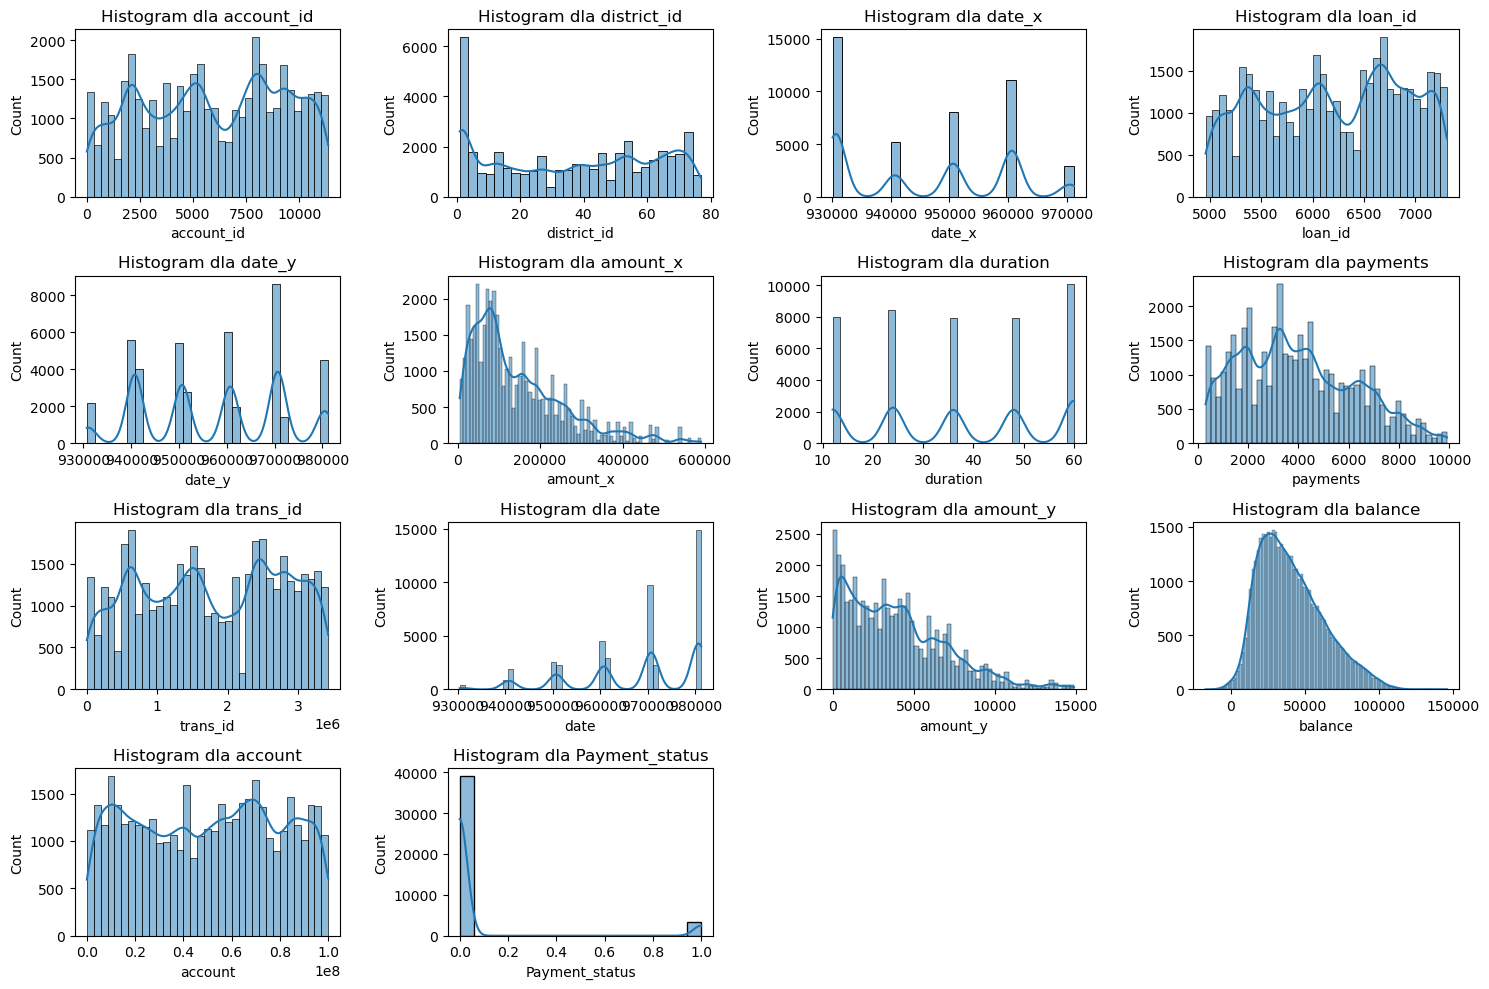

In [67]:
# Eksploracja danych

print(Full_df.describe())
print(Full_df.info())

# Brakujące wartości
print(Full_df.isnull().sum())
Full_df.dropna(inplace=True) 

# Liczba zmiennych numerycznych
num_cols = Full_df.select_dtypes(include=['float64', 'int64']).columns

#Tworzenie histogramów
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)  
    sns.histplot(Full_df[col], kde=True)
    plt.title(f'Histogram dla {col}')
plt.tight_layout()
plt.show()


account_id       -0.029330
district_id      -0.013866
date_x           -0.058226
loan_id          -0.027749
date_y           -0.065937
amount_x          0.221625
duration          0.046504
payments          0.212819
trans_id         -0.029630
date             -0.020831
amount_y          0.012843
balance          -0.144636
account          -0.049779
Payment_status    1.000000
Name: Payment_status, dtype: float64


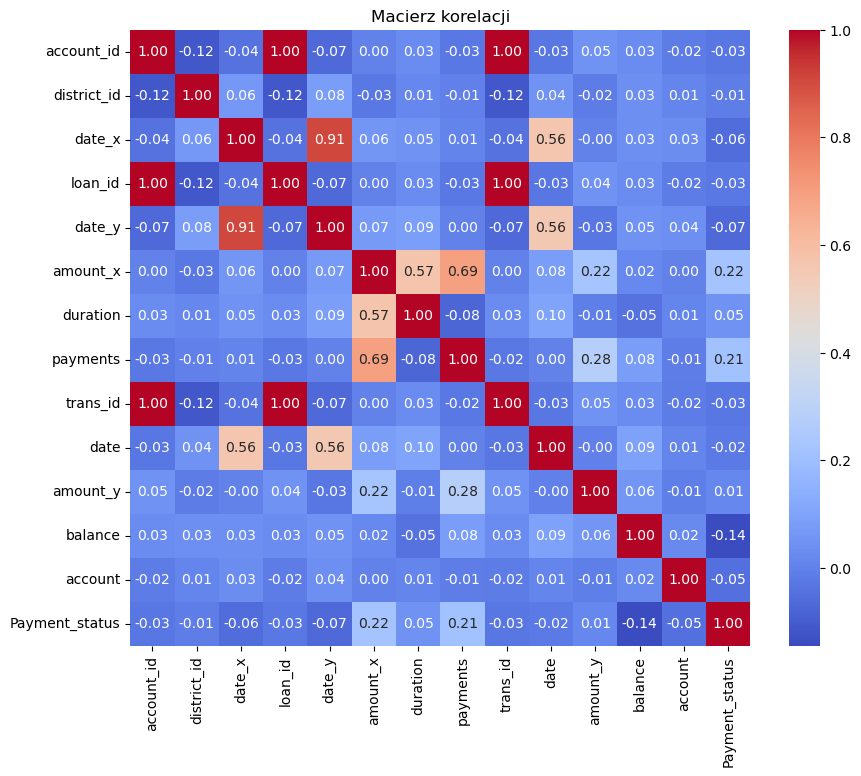

In [58]:
# Oblicz korelacje

num_cols = Full_df.select_dtypes(include=['float64', 'int64'])
korelacje = num_cols.corr()

# Wyciągnięcie korelacji z Payment_status
korelacje_payment_status = korelacje['Payment_status']
print(korelacje_payment_status)

# Wizualizacja macierzy korelacji
plt.figure(figsize=(10, 8))
sns.heatmap(korelacje, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Macierz korelacji')
plt.show()

In [73]:
# Model predykcyjny

# Zakodowanie zmiennych kategorycznie
data_coded = pd.get_dummies(Full_df, drop_first=True) 

# Oddzielenie cech i etykiety
X = data_coded.drop('Payment_status', axis=1)  
y = data_coded['Payment_status']  

# Standaryzacja
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Podział danych na zestawy treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model regresji logistycznej
model_regresji = LogisticRegression()
model_regresji.fit(X_train, y_train)
y_pred_model_regresji = model_regresji.predict(X_test)

# Model drzewa decyzyjnego
model_drzewo = DecisionTreeClassifier()
model_drzewo.fit(X_train, y_train)
y_pred_model_drzewo = model_drzewo.predict(X_test)

# Obliczanie metryk
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return accuracy, precision, recall

metrics_logreg = evaluate_model(y_test, y_pred_model_regresji)
metrics_dtree = evaluate_model(y_test, y_pred_model_drzewo)

print(f"Logistic Regression - Accuracy: {metrics_logreg[0]}, Precision: {metrics_logreg[1]}, Recall: {metrics_logreg[2]}")
print(f"Decision Tree - Accuracy: {metrics_dtree[0]}, Precision: {metrics_dtree[1]}, Recall: {metrics_dtree[2]}")



Logistic Regression - Accuracy: 1.0, Precision: 1.0, Recall: 1.0
Decision Tree - Accuracy: 1.0, Precision: 1.0, Recall: 1.0


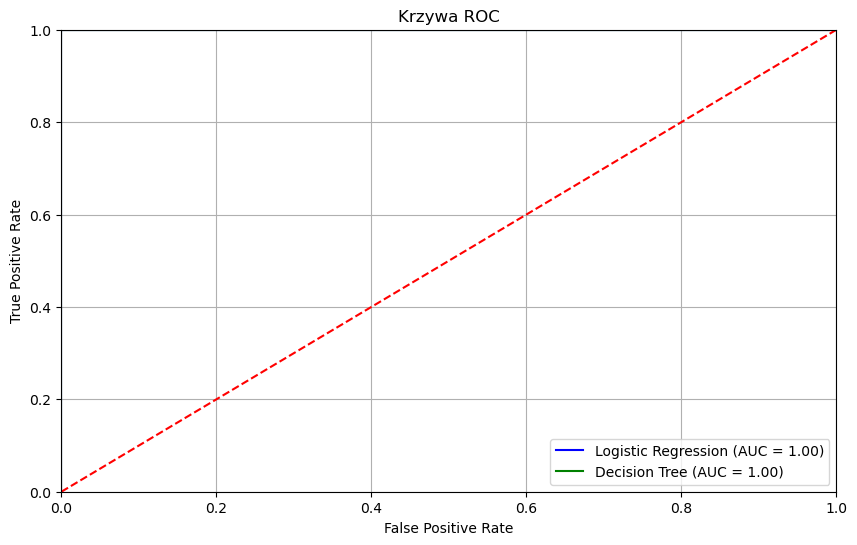

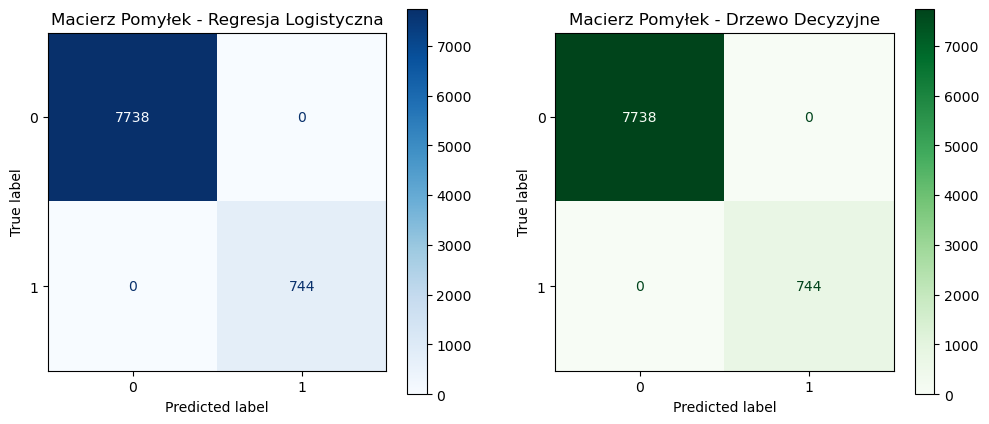

In [76]:
# Obliczanie prawdopodobieństw dla krzywej ROC
y_probs_logreg = model_regresji.predict_proba(X_test)[:, 1]  
y_probs_dtree = model_drzewo.predict_proba(X_test)[:, 1]

# Obliczanie krzywej ROC
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_probs_logreg)
fpr_dtree, tpr_dtree, _ = roc_curve(y_test, y_probs_dtree)

# Obliczanie AUC
roc_auc_logreg = roc_auc_score(y_test, y_probs_logreg)
roc_auc_dtree = roc_auc_score(y_test, y_probs_dtree)

# Wizualizacja krzywej ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_logreg, tpr_logreg, color='blue', label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_dtree, tpr_dtree, color='green', label=f'Decision Tree (AUC = {roc_auc_dtree:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywa ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Obliczanie macierzy pomyłek
conf_matrix_logreg = confusion_matrix(y_test, y_pred_model_regresji)
conf_matrix_dtree = confusion_matrix(y_test, y_pred_model_drzewo)

# Wizualizacja macierzy pomyłek
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay(conf_matrix_logreg).plot(ax=ax[0], cmap='Blues', values_format='d')
ax[0].set_title('Macierz Pomyłek - Regresja Logistyczna')

ConfusionMatrixDisplay(conf_matrix_dtree).plot(ax=ax[1], cmap='Greens', values_format='d')
ax[1].set_title('Macierz Pomyłek - Drzewo Decyzyjne')

plt.show()

Na podstawie analizy kluczowe cechy do przewidywania niespłaconych pożyczek to:
Kwota pożyczki (amount)
Liczba spłat (payments)
Saldo konta (balance)

1. Najsilniejsze korelacje

Kwota pożyczki (amount) - im większa kwota pożyczki, tym większe ryzyko niespłacenia
Liczba spłat (payments) - dla klientów, którzy mają więcej zaległości w spłatach istnieje większe ryzyko niespłacenia

2. Słabsze korelacje

Czas trwania (duration) - im dłuższe okresy spłaty tym większe ryzyko niespłacenia
Saldo konta (balance) - im niższe saldo tym większe ryzyko niespłacenia

Reszta danych nie ma znaczącego wpływu na przewidywanie niespłaconych pożyczek

Inżynieria cech:

Można stworzyć nowe cechy w celu ulepszenia modelu: 
Wskaźnik spłat: stosunek payments do amount_x (kwota pożyczki) w celu obliczenia zdolność do spłaty.
Czas do spłaty: różnica między datą pożyczki a datą ostatniej spłaty

Wykorzystanie modelu:
- Ocena ryzyka
- segmentacja klienta
- Optymalizacja oferty